# FFT on original series
* Série não detrended

fonte: https://pythontic.com/visualization/signals/fouriertransform_fft

*ToDo*
* ( )Entender a sampling frequency
* () Entender as variáveis tpCount e as seguintes

# 1. Load and visualize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
city='Portland'
data = pd.read_csv('../data/temperature.csv',
                      usecols=['datetime', city],
                      parse_dates=['datetime'],
                      index_col=['datetime'],
                      infer_datetime_format=True,
                      skiprows=[1])

In [4]:
data.head()

,Portland
datetime,
2012-10-01 13:00:00,282.080000
2012-10-01 14:00:00,282.083252
2012-10-01 15:00:00,282.091866
2012-10-01 16:00:00,282.100481
2012-10-01 17:00:00,282.109095


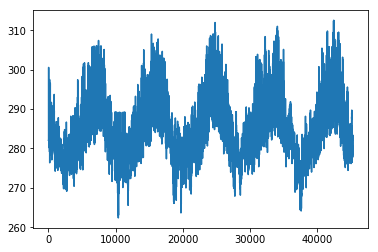

In [5]:
plt.plot([i for i in range(data.shape[0])], data[city])

# 2. FFT on original series

In [6]:
def fft(data):
    magnitude = data

    # |?| Entender melhor a sampling frequency
    samplingFrequency = len(magnitude)
    fourierTransform = np.fft.fft(magnitude)

    # Frequency domain representation
    fourierTransform = fourierTransform/len(magnitude)           # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(magnitude)/2))] # Exclude sampling frequency

    tpCount     = len(magnitude)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod
    
    
    # remove sinal [?]
    frequencies = frequencies[1:]
    fourierTransform = fourierTransform[1:]

    return frequencies, fourierTransform

In [9]:
frequencies, fourier = fft(data[city])

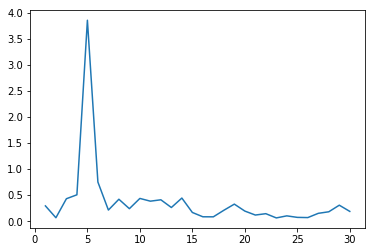

In [11]:
# Plotamos os valores absolutos da série de Fourier
plt.plot(frequencies[:30], abs(fourier)[:30])

# 3. Ordered signals by frequency

In [17]:
ordered_freqs = list(zip(frequencies, fourier))

In [18]:
sorted_by_freqs = sorted(ordered_freqs, key=lambda tup: tup[1])

In [19]:
print("frequency signal, fft result")
for i, item in enumerate(sorted_by_freqs[:10]):
    print(i+1, ":", item)

frequency signal, fft result
1 : (5.0, (-0.8458648035527341+3.764688901100609j))
2 : (1886.0, (-0.4410002118711071+1.0752020681143517j))
3 : (1880.0, (-0.401629173727187-0.1070746655460675j))
4 : (10.0, (-0.3838865819305447+0.209071733955313j))
5 : (1891.0, (-0.33622783249815846-0.2103445647999346j))
6 : (88.0, (-0.23958182617071083+0.029864415710588385j))
7 : (57.0, (-0.21578697840258843-0.08310784669244894j))
8 : (78.0, (-0.20497610894470328-0.0599727194364984j))
9 : (75.0, (-0.1832974664015593+0.004045394102329828j))
10 : (1.0, (-0.17962156547752536+0.23233273118926911j))
